# Cleaning Team Data

In this notebook we will clean the data collected on every team in the NBA. This includes stats of every team in the regular and playoff season

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [2]:
# loading into dataframe

team_data_dir = "../data/raw/teams_regSeason_data"


team_data_frames = []

for filename in os.listdir(team_data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(team_data_dir, filename)
        
        team_name = filename.split("_")[0]  
        df = pd.read_csv(file_path)
        df['team_name'] = team_name #adding team name to dataframe
        team_data_frames.append(df)
team_data_combined = pd.concat(team_data_frames, ignore_index=True)

In [3]:
team_data_combined.head(10)

,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK,team_name
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,...,0,0,1330,2057,0,0,0,5313,10,Atlanta Hawks
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,...,0,0,1476,2092,0,0,0,5730,3,Atlanta Hawks
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,...,0,0,1229,1848,0,0,0,4833,10,Atlanta Hawks
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,...,0,0,1427,2120,0,0,0,5389,9,Atlanta Hawks
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,...,0,0,1298,1771,0,0,0,5038,9,Atlanta Hawks
5,1610612737,Milwaukee,Hawks,1954-55,72,26,46,0.361,0,4,...,0,0,1544,1904,0,0,0,6291,8,Atlanta Hawks
6,1610612737,St. Louis,Hawks,1955-56,72,33,39,0.458,0,2,...,0,0,1748,1971,0,0,0,6953,6,Atlanta Hawks
7,1610612737,St. Louis,Hawks,1956-57,72,34,38,0.472,0,1,...,0,0,1454,1848,0,0,0,7091,6,Atlanta Hawks
8,1610612737,St. Louis,Hawks,1957-58,72,41,31,0.569,0,1,...,0,0,1541,1875,0,0,0,7738,3,Atlanta Hawks
9,1610612737,St. Louis,Hawks,1958-59,72,49,23,0.681,0,1,...,0,0,1567,1937,0,0,0,7830,4,Atlanta Hawks


Some of the teams in the NBA had different names years ago (for eg : in the 1951-52 season 'Atlanta Hawks' was called 'Milwaukee Hawks'). To keep the names consistent we have added a separate column called `team_name` which contains the current name of the team based on their id since the ids havent changed. 

In [4]:
team_data_combined.columns

Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK',
       'team_name'],
      dtype='object')

As you can see there are two columns called 'team_name' where one of them is just the nickname for the team so we will rename the column accordingly and also change all columns to lowercase to maintain consistency :

In [5]:
column_name_mapping = {
    'TEAM_ID': 'team_id',
    'TEAM_CITY': 'team_city',
    'TEAM_NAME' : 'team_nickname',
    'YEAR' : 'season',
    'GP': 'games_played',
    'WINS': 'wins',
    'LOSSES': 'losses',
    'WIN_PCT': 'win_pct',
    'CONF_RANK' : 'conference_rank', 
    'DIV_RANK' : 'division_rank', 
    'PO_WINS' : 'playoff_wins', 
    'PO_LOSSES' : 'playoff_losses',
    'CONF_COUNT' : 'conference_count', 
    'DIV_COUNT' : 'division_count', 
    'NBA_FINALS_APPEARANCE' : 'nba_finals_appearance',
    'FGM': 'field_goals_made',
    'FGA' : 'field_goals_attempted',
    'FG_PCT': 'field_goal_pct',
    'FG3M': 'three_pointers_made',
    'FG3A': 'three_pointers_attempted',
    'FG3_PCT': 'three_point_pct',
    'FTM': 'free_throws_made',
    'FTA': 'free_throws_attempted',
    'FT_PCT': 'free_throw_pct',
    'OREB': 'offensive_rebounds',
    'DREB': 'defensive_rebounds',
    'REB': 'total_rebounds',
    'AST': 'assists',
    'PF': 'personal_fouls',
    'STL': 'steals',
    'BLK': 'blocks',
    'TOV': 'turnovers',
    'PTS': 'points',
    'PTS_RANK': 'points_rank',
    'team_name' : 'team_name'
}

In [6]:
team_data_combined = team_data_combined.rename(columns=column_name_mapping)

In [7]:
team_data_combined.head(10)

,team_id,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,division_rank,...,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank,team_name
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,...,0,0,1330,2057,0,0,0,5313,10,Atlanta Hawks
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,...,0,0,1476,2092,0,0,0,5730,3,Atlanta Hawks
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,...,0,0,1229,1848,0,0,0,4833,10,Atlanta Hawks
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,...,0,0,1427,2120,0,0,0,5389,9,Atlanta Hawks
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,...,0,0,1298,1771,0,0,0,5038,9,Atlanta Hawks
5,1610612737,Milwaukee,Hawks,1954-55,72,26,46,0.361,0,4,...,0,0,1544,1904,0,0,0,6291,8,Atlanta Hawks
6,1610612737,St. Louis,Hawks,1955-56,72,33,39,0.458,0,2,...,0,0,1748,1971,0,0,0,6953,6,Atlanta Hawks
7,1610612737,St. Louis,Hawks,1956-57,72,34,38,0.472,0,1,...,0,0,1454,1848,0,0,0,7091,6,Atlanta Hawks
8,1610612737,St. Louis,Hawks,1957-58,72,41,31,0.569,0,1,...,0,0,1541,1875,0,0,0,7738,3,Atlanta Hawks
9,1610612737,St. Louis,Hawks,1958-59,72,49,23,0.681,0,1,...,0,0,1567,1937,0,0,0,7830,4,Atlanta Hawks


In [8]:
team_data_combined.columns

Index(['team_id', 'team_city', 'team_nickname', 'season', 'games_played',
       'wins', 'losses', 'win_pct', 'conference_rank', 'division_rank',
       'playoff_wins', 'playoff_losses', 'conference_count', 'division_count',
       'nba_finals_appearance', 'field_goals_made', 'field_goals_attempted',
       'field_goal_pct', 'three_pointers_made', 'three_pointers_attempted',
       'three_point_pct', 'free_throws_made', 'free_throws_attempted',
       'free_throw_pct', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'personal_fouls', 'steals', 'turnovers',
       'blocks', 'points', 'points_rank', 'team_name'],
      dtype='object')

Lets now reorder these columns to improve readability :

In [9]:
column_order = ['team_id', 'team_name'] + [col for col in team_data_combined.columns if (col != 'team_id') & (col != 'team_name')]
team_data_combined = team_data_combined.reindex(columns=column_order)

In [10]:
team_data_combined.head(10)

,team_id,team_name,team_city,team_nickname,season,games_played,wins,losses,win_pct,conference_rank,...,offensive_rebounds,defensive_rebounds,total_rebounds,assists,personal_fouls,steals,turnovers,blocks,points,points_rank
0,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Atlanta Hawks,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Atlanta Hawks,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Atlanta Hawks,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Atlanta Hawks,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,...,0,0,0,1298,1771,0,0,0,5038,9
5,1610612737,Atlanta Hawks,Milwaukee,Hawks,1954-55,72,26,46,0.361,0,...,0,0,0,1544,1904,0,0,0,6291,8
6,1610612737,Atlanta Hawks,St. Louis,Hawks,1955-56,72,33,39,0.458,0,...,0,0,0,1748,1971,0,0,0,6953,6
7,1610612737,Atlanta Hawks,St. Louis,Hawks,1956-57,72,34,38,0.472,0,...,0,0,0,1454,1848,0,0,0,7091,6
8,1610612737,Atlanta Hawks,St. Louis,Hawks,1957-58,72,41,31,0.569,0,...,0,0,0,1541,1875,0,0,0,7738,3
9,1610612737,Atlanta Hawks,St. Louis,Hawks,1958-59,72,49,23,0.681,0,...,0,0,0,1567,1937,0,0,0,7830,4


Lets now look at how many missing values there are in each column :

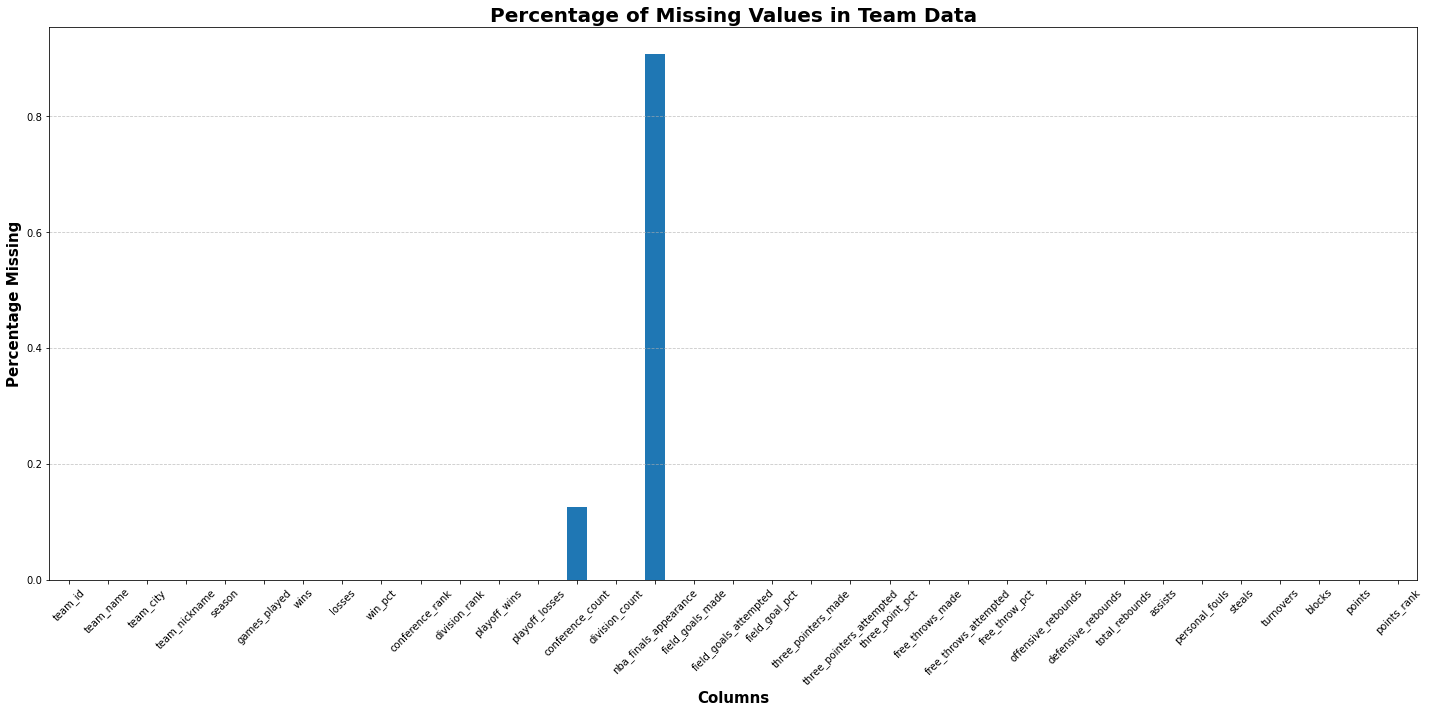

In [44]:
plt.figure(figsize=(20, 10)) 
plot = team_data_combined.isna().mean().plot(kind='bar')
plot.set_title('Percentage of Missing Values in Team Data', fontweight='bold', fontsize=20)
plot.set_xlabel('Columns', fontweight='bold', fontsize=15)
plot.set_ylabel('Percentage Missing', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the above we can see the only columns that have missing values are `playoff_losses` and `division_count`. Since these fields wont really have an impact on our analysis, we will keep them

Lets save this data to a csv file :

In [43]:
output_dir = os.path.join("..", "data", "cleaned", "team_regSeason_data")
os.makedirs(output_dir, exist_ok=True)

output_filename = os.path.join(output_dir, "team_regSeason_stats.csv")
team_data_combined.to_csv(output_filename, index=False)